In [2]:
import pandas as pd
import quandl as qdl

df = qdl.get("WIKI/GOOGL")

df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [8]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [9]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [10]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [11]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [12]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [3]:
#Features and Labels
import quandl
import pandas as pd

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [8]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [58]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df))) #seeing 1 percent of the future prices of the dataset

In [62]:
df['label'] = df[forecast_col].shift(-forecast_out) #shift 'Adj. Close' values upwards

In [65]:
df.head(36)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849
2004-08-26,54.122070,3.048837,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.514115,0.048866,4917800.0,70.462511


In [69]:
#https://stackoverflow.com/questions/44689811/unable-to-understand-the-prediction-algorithm-in-pandas
forecast_col ='Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))
print ("Dataset= " + str(len(df)))
print ("Forecasting after how many days = " + str(forecast_out))
df['label']=df[forecast_col].shift(-forecast_out)
df.head(36)

Dataset= 3355
Forecasting after how many days = 34


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.639972
2004-08-20,54.322689,7.921706,7.227007,22834300.0,69.078238
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,67.839414
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,68.912727
2004-08-25,53.164113,3.886792,1.183658,9188600.0,70.668146
2004-08-26,54.122070,3.048837,2.820391,7094800.0,71.219849
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,72.278116
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.810934
2004-08-31,51.343492,1.514115,0.048866,4917800.0,74.199045


In [5]:
#Training and Testing
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

df = quandl.get("WIKI/GOOGL")

#print(df.head())
#print(df.tail())

df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']] #features we want

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']] #features we now want
#print(df.head())

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849


In [11]:
df.dropna(inplace=True) #remove NaN values from df

Adj. Close     0
HL_PCT         0
PCT_change     0
Adj. Volume    0
label          0
dtype: int64

In [12]:
X = np.array(df.drop(['label'], 1)) #where ['label'] is the column we want to drop, 1 being the axis, .drop returns  a new dataframe
y = np.array(df['label'])

In [13]:
X = preprocessing.scale(X)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9769875973439739


In [4]:
#Regression - Forecasting and Predicting
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9773328525939575


In [7]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[1101.25642886 1073.55999012 1018.67702867 1058.98488256 1074.72795454
 1075.44676938 1093.01169096 1111.62055746 1116.92334859 1124.19495045
 1134.00089891 1130.98496235 1149.80066425 1166.29506766 1137.35163147
 1123.98485702 1088.06867334 1103.28163082 1115.07840865 1123.20125718
 1136.06661193 1151.86499984 1182.32789901 1187.9855046  1158.06826486
 1170.96088086 1171.63799442 1154.73422496 1119.22683642 1116.17970205
 1114.79626806 1070.82022517 1043.02949313 1070.56956845 1018.92257605] 0.9773328525939575 35


In [10]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [11]:
df['Forecast'] = np.nan

In [13]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [17]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

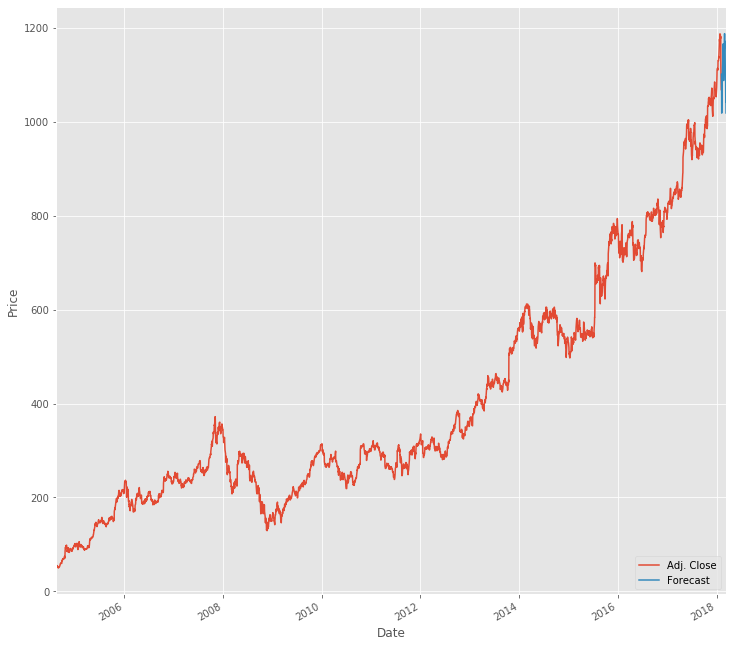

In [21]:
df['Adj. Close'].plot(figsize=(12,12))
df['Forecast'].plot(figsize=(12,12))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

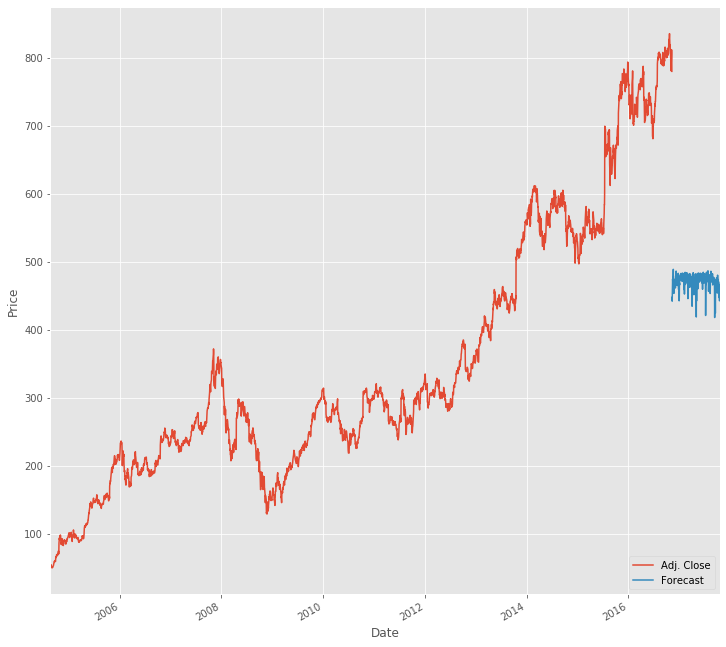

In [5]:
#Picking and Scaling
import quandl,math
import numpy as np
import pandas as pd
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime,pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close' #column label we want to forecast
df.fillna(value=-99999, inplace=True) #preprocessing fill in NaN to not lose precious data
forecast_out = int(math.ceil(0.1 * len(df))) #days in the future we want to forecast out, used in training set

df['label'] = df[forecast_col].shift(-forecast_out) # training set label columns

X = np.array(df.drop(['label','Adj. Close'], 1)) #training dropped feature 
X = preprocessing.scale(X) #normalize/standardize values
X_lately = X[-forecast_out:] #days into the future to predict, test set
X = X[:-forecast_out] #data used as training set



df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #it takes 20% of total data set
#COMMENTED OUT:
# clf = svm.SVR(kernel='linear')
# clf.fit(X_train, y_train)
# with open('linearregression.pickle','wb') as f:
#     pickle.dump(clf, f)
# confidence = clf.score(X_test, y_test)
# print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot(figsize=(12,12))
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()